# Task 1 & 2:

In [10]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


#Importing the dataset
rawdata = pd.read_csv("LoanTrain.csv")

#Reading and understanding the dataset

print("Shape : ", rawdata.shape)

print('Data Info:\n')
print(rawdata.info())

print('Loan Status Value Counts:\n')
print(rawdata['Loan_Status'].value_counts(dropna=False))

Shape :  (614, 13)
Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Loan Status Value Counts:

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
#Viewing the data
rawdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Task 3:

In [4]:
#Perform missing value imputation

print('Feature count of missing values: \n')
print(rawdata.isnull().sum())

Feature count of missing values: 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
#Fill in missing values for Gender, Married, Dependents, CreditHistory, SelfEmployed, and --
# -- LoanAmountTerm features

rawdata['Gender'].fillna(rawdata['Gender'].mode()[0],inplace=True)
rawdata['Married'].fillna(rawdata['Married'].mode()[0],inplace=True)
rawdata['Dependents'].fillna(rawdata['Dependents'].mode()[0],inplace=True)
rawdata['Credit_History'].fillna(rawdata['Credit_History'].mode()[0],inplace=True)
rawdata['Self_Employed'].fillna(rawdata['Self_Employed'].mode()[0],inplace=True)
rawdata['Loan_Amount_Term'].fillna(rawdata['Loan_Amount_Term'].mode()[0],inplace=True)

In [7]:
#Use median to fill the null values of the 'loan Amount' variable

rawdata['LoanAmount'].fillna(rawdata['LoanAmount'].median(), inplace=True)

In [9]:
#Check whether all the missing values are filled in the dataset

print('Feature count of missing values: \n')
print(rawdata.isnull().sum())

Feature count of missing values: 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# Task 4:

<AxesSubplot:>

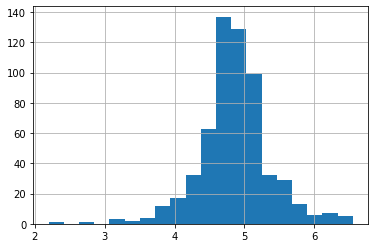

In [12]:
#using log transformations for the 'LoanAmount' feature to treat outliers

rawdata['LoanAmount_log']=np.log(rawdata['LoanAmount'])

#Using a histogram to show the distrubtion
rawdata['LoanAmount_log'].hist(bins=20)


In [13]:
#dropping the Loan_ID variable as it doesn't have any effect on the loan status
rawdata = rawdata.drop('Loan_ID', axis=1)

In [18]:
#Making dummy variables for categorical variables

rawdata = pd.get_dummies(rawdata)
rawdata.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,NaN,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


# Task 5:

In [23]:
#Creating new feature 'Total Income' which is the sum of 'ApplicantIncome' and 'CoapplicantIncome'
rawdata['Total_Income']=rawdata['ApplicantIncome']+rawdata['CoapplicantIncome']
rawdata[['Total_Income']].head()

,Total_Income
0,0.0
1,3016.0
2,0.0
3,4716.0
4,0.0


In [24]:
#Creating new feature 'EMI' 

rawdata['EMI']=rawdata['LoanAmount']/rawdata['Loan_Amount_Term']
rawdata[['EMI']].head()

,EMI
0,NaN
1,0.355556
2,0.183333
3,0.333333
4,0.391667


In [27]:
#Creating 'Balance Income' which is the income left after EMI has been paid

rawdata['Balance_Income']=rawdata['Total_Income']-(rawdata['EMI']*1000)
rawdata[['Balance_Income']].head()

,Balance_Income
0,NaN
1,2660.444444
2,-183.333333
3,4382.666667
4,-391.666667


In [34]:
#Dropping the variables used to create these new features

rawdata=rawdata.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)



KeyError: "['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'] not found in axis"

In [35]:
rawdata.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,EMI,Balance_Income
0,1.0,NaN,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,1,0.0,NaN,NaN
1,1.0,4.852030,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,3016.0,0.355556,2660.444444
2,1.0,4.189655,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0.0,0.183333,-183.333333
3,1.0,4.787492,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,1,4716.0,0.333333,4382.666667
4,1.0,4.948760,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,1,0.0,0.391667,-391.666667


# Task 6:

In [40]:
#Dropping the target feature from the dataset and saving it in another dataset

X = rawdata.drop('Loan_Status', 1)
y = rawdata[['Loan_Status']]

KeyError: "['Loan_Status'] not found in axis"

In [39]:
rawdata.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,EMI,Balance_Income
0,1.0,NaN,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,1,0.0,NaN,NaN
1,1.0,4.852030,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,3016.0,0.355556,2660.444444
2,1.0,4.189655,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0.0,0.183333,-183.333333
3,1.0,4.787492,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,1,4716.0,0.333333,4382.666667
4,1.0,4.948760,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,1,0.0,0.391667,-391.666667
